In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     # visualization libaray
import seaborn as sns       # visualization libaray
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

C:\Users\gaura\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


- The goal of this project is to develop a predictive model for estimating household income based on various demographic and socioeconomic features. Using the provided dataset, we aim to identify the key factors that influence household income and build a robust regression model to predict income levels. This analysis will help in understanding the socioeconomic determinants of income and assist in policy-making and economic planning. 


- Objectives:

  - Explore and preprocess the dataset to handle missing values and outliers.
  - Perform exploratory data analysis (EDA) to understand the relationships between features and income.
  - Select appropriate features and engineer new ones if necessary.
  - Train multiple regression models and evaluate their performance.
  - Interpret the model results to provide insights into the factors affecting household income.

- Features:

  - Age: Age of the primary household member (18 to 70 years).

  - Education Level: Highest education level attained (High School, Bachelor's, Master's, Doctorate).

   - Occupation: Type of occupation (Healthcare, Education, Technology, Finance, Others)

   - Number of Dependents: Number of dependents in the household (0 to 5).

   - Location: Residential location (Urban, Suburban, Rural).

   - Work Experience: Years of work experience (0 to 50 years).

   - Marital Status: Marital status of the primary household member (Single, Married, Divorced).

   - Employment Status: Employment status of the primary household member (Full-time, Part-time, Self-employed).

   - Household Size: Total number of individuals living in the household (1 to 7).

   - Homeownership Status: Homeownership status (Own, Rent).

   - Type of Housing: Type of housing (Apartment, Single-family home, Townhouse).

   - Gender: Gender of the primary household member (Male, Female).

   - Primary Mode of Transportation: Primary mode of transportation used by the household member(Car, Public transit, Biking, Walking).

   - Annual Household Income: Actual annual household income, Unit USD

In [2]:
df = pd.read_csv(r"Data Sets\Data.csv")

In [3]:
df.head(10)

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
5,25,High School,Others,1,Rural,6,Single,Part-time,1,Rent,Townhouse,Female,Car,73406
6,38,Master's,Technology,3,Rural,20,Married,Full-time,4,Rent,Single-family home,Male,Public transit,3584362
7,56,Master's,Education,1,Suburban,34,Married,Part-time,7,Own,Townhouse,Female,Public transit,70066
8,36,Master's,Finance,4,Suburban,45,Married,Full-time,2,Own,Apartment,Female,Public transit,69636
9,40,Bachelor's,Education,4,Urban,21,Married,Full-time,6,Own,Apartment,Female,Biking,5188124


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

In [5]:
df.shape  # Check to shape of data

(10000, 14)

In [6]:
df.dtypes

Age                                int64
Education_Level                   object
Occupation                        object
Number_of_Dependents               int64
Location                          object
Work_Experience                    int64
Marital_Status                    object
Employment_Status                 object
Household_Size                     int64
Homeownership_Status              object
Type_of_Housing                   object
Gender                            object
Primary_Mode_of_Transportation    object
Income                             int64
dtype: object

In [7]:
df.Education_Level.dtype

dtype('O')

### Let us check the unique value of each categorical columns. 

In [8]:
for col in df.columns:
    if df[col].dtype == "object":
        print(f"The unique value for the columns {col} are: \n\t\t{df[col].unique()} and the no of unique values are :- {df[col].nunique()}")

The unique value for the columns Education_Level are: 
		["Master's" 'High School' "Bachelor's" 'Doctorate'] and the no of unique values are :- 4
The unique value for the columns Occupation are: 
		['Technology' 'Finance' 'Others' 'Education' 'Healthcare'] and the no of unique values are :- 5
The unique value for the columns Location are: 
		['Urban' 'Rural' 'Suburban'] and the no of unique values are :- 3
The unique value for the columns Marital_Status are: 
		['Married' 'Single' 'Divorced'] and the no of unique values are :- 3
The unique value for the columns Employment_Status are: 
		['Full-time' 'Self-employed' 'Part-time'] and the no of unique values are :- 3
The unique value for the columns Homeownership_Status are: 
		['Own' 'Rent'] and the no of unique values are :- 2
The unique value for the columns Type_of_Housing are: 
		['Apartment' 'Single-family home' 'Townhouse'] and the no of unique values are :- 3
The unique value for the columns Gender are: 
		['Male' 'Female'] and th

In [9]:
for col in df.columns:
    if df[col].dtype == "int64":
        print(f"The Total of value for the int columns {col} are : \n\t\t {df[col].unique()} and number of unique value are: {df[col].nunique()}")

The Total of value for the int columns Age are : 
		 [56 69 46 32 60 25 38 36 40 28 41 70 53 57 20 39 19 61 47 55 50 29 42 66
 44 59 45 33 64 68 54 24 26 35 21 31 67 43 37 52 34 23 51 27 48 65 62 58
 18 22 30 49 63] and number of unique value are: 53
The Total of value for the int columns Number_of_Dependents are : 
		 [5 0 1 2 3 4] and number of unique value are: 6
The Total of value for the int columns Work_Experience are : 
		 [21  4  1 32 15  6 20 34 45 50 47  5 38 42 24 17 40 23 39 22 28  9 14 25
 33 30  8 26 29  3 46 19 44  0  2 16 31  7 43 27 18 41 13 36 37 10 35 12
 48 49 11] and number of unique value are: 51
The Total of value for the int columns Household_Size are : 
		 [7 1 4 2 6 5 3] and number of unique value are: 7
The Total of value for the int columns Income are : 
		 [  72510   75462   71748 ... 2684820   57955 1131084] and number of unique value are: 7667


- observation:
    - It can seen the coulmns there is no different type of category

## Find the missing values 

In [10]:
df.isna().sum()   

Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
dtype: int64

- Observation:-  There is no missing value on here.

In [11]:
column_name = df.columns
column_name

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income'],
      dtype='object')

In [12]:
values = df.values
values

array([[56, "Master's", 'Technology', ..., 'Male', 'Public transit',
        72510],
       [69, 'High School', 'Finance', ..., 'Male', 'Biking', 75462],
       [46, "Bachelor's", 'Technology', ..., 'Female', 'Car', 71748],
       ...,
       [41, 'Doctorate', 'Education', ..., 'Female', 'Public transit',
        2684820],
       [44, 'High School', 'Education', ..., 'Male', 'Biking', 57955],
       [37, 'High School', 'Healthcare', ..., 'Male', 'Public transit',
        1131084]], dtype=object)

In [13]:
df.Work_Experience.values   # Check a value

array([21,  4,  1, ..., 50,  3, 48], dtype=int64)

In [14]:
df.Household_Size.values

array([7, 7, 7, ..., 4, 1, 7], dtype=int64)

## identifying outliers in a numeric column using a box plot

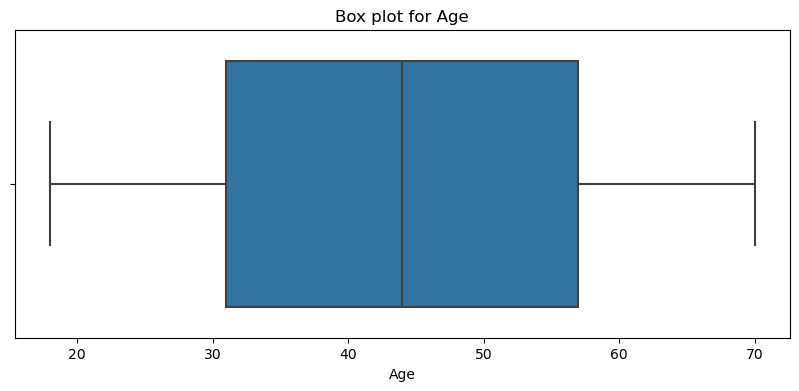

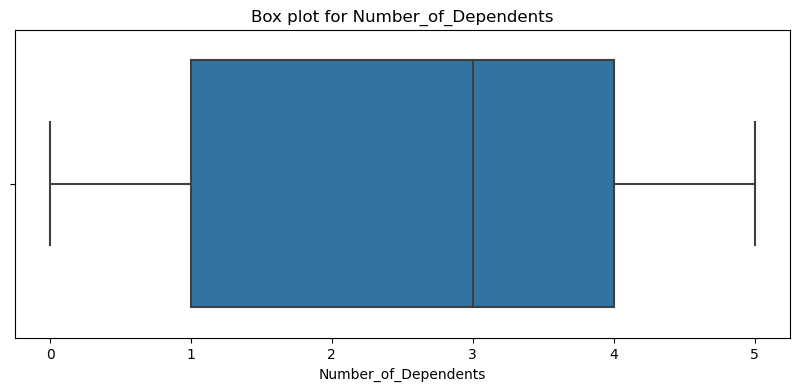

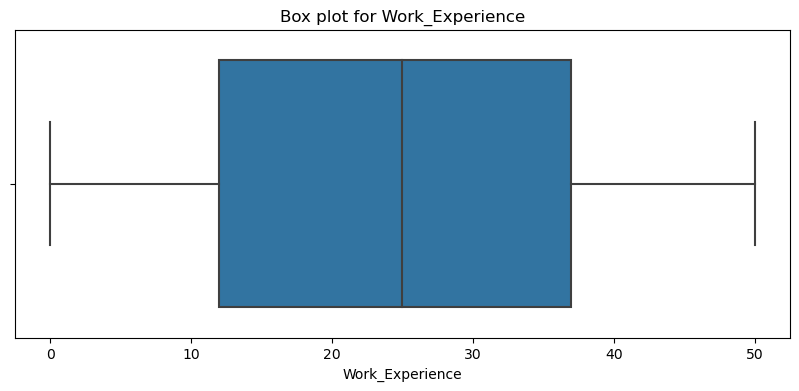

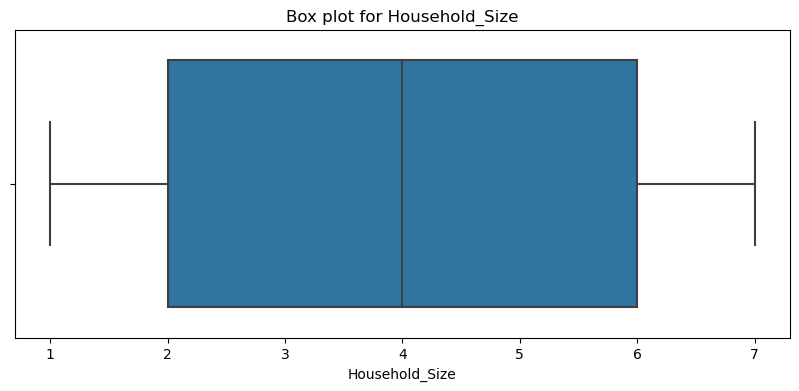

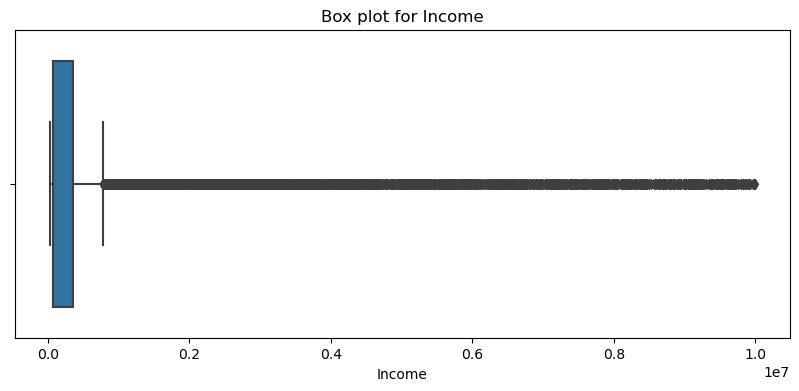

In [15]:
# Example for identifying outliers in a numeric column using a box plot
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot for {column}')
    plt.show()

In [16]:
df.columns

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income'],
      dtype='object')

## identifying kurtosis in a numeric column using a kdeplot

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


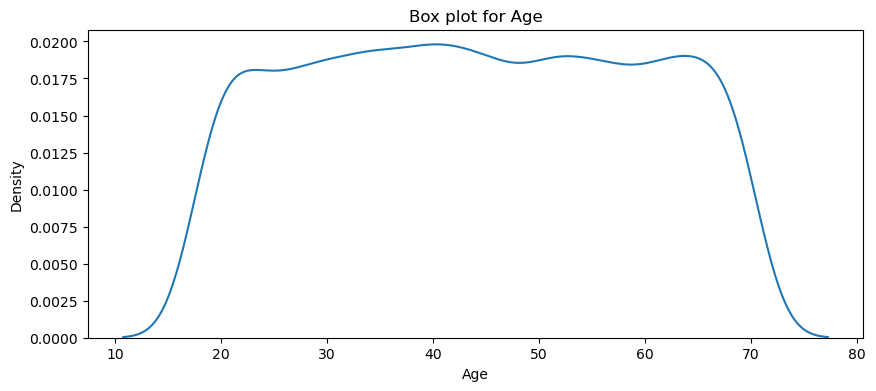

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


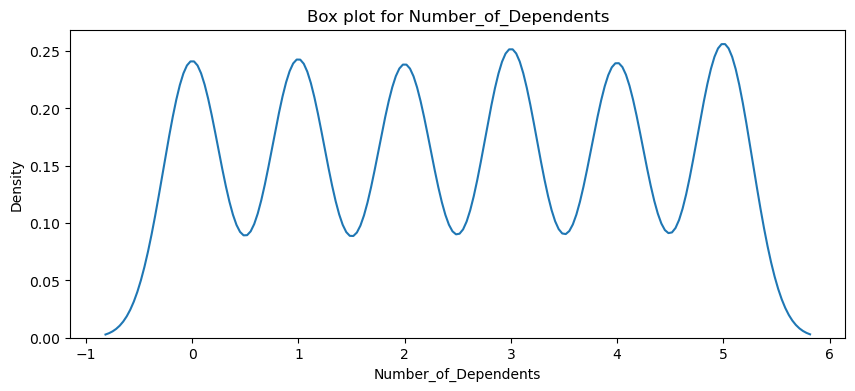

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


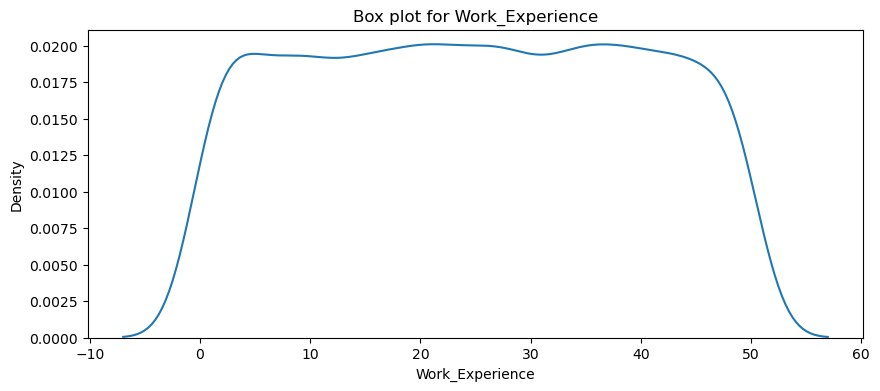

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


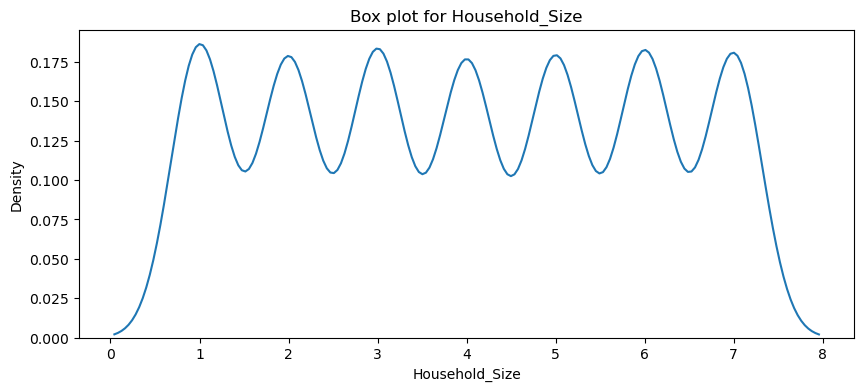

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


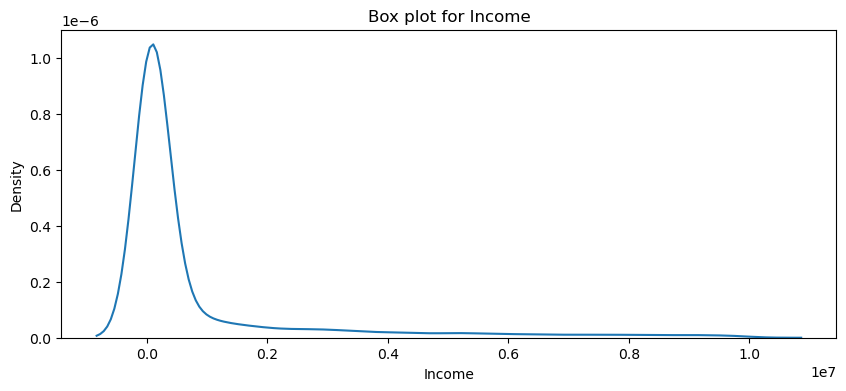

In [17]:
# Example for identifying kurtosis in a numeric column using a kdeplot
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(x=df[column])
    plt.title(f'Box plot for {column}')
    plt.show()

## identifying outliers in a numeric column using a box plot

C:\Users\gaura\AppData\Local\Temp\ipykernel_10788\1218534071.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[column])
C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


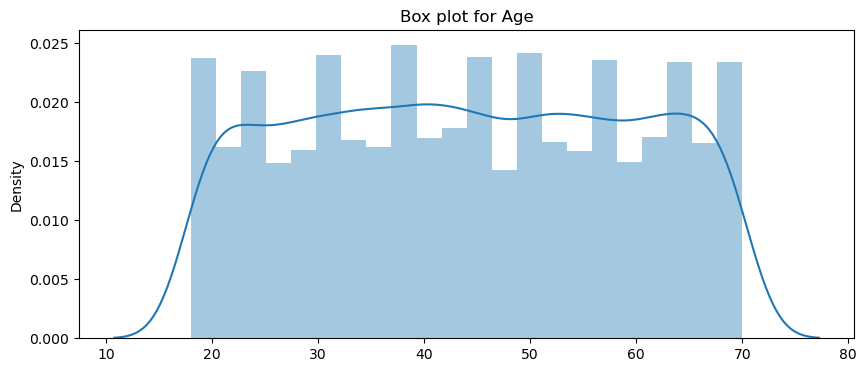

C:\Users\gaura\AppData\Local\Temp\ipykernel_10788\1218534071.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[column])
C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


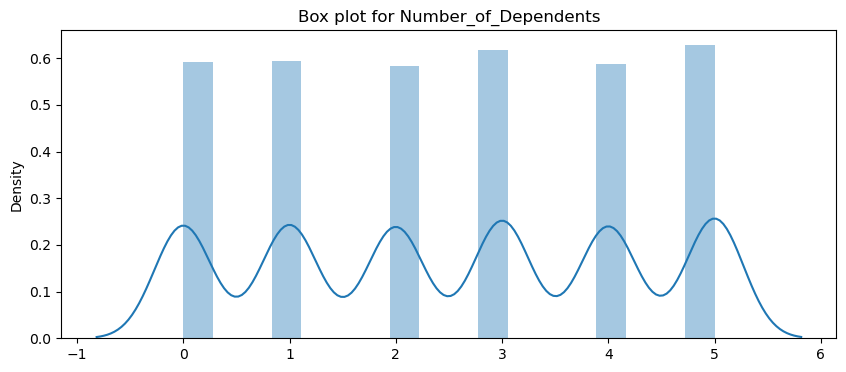

C:\Users\gaura\AppData\Local\Temp\ipykernel_10788\1218534071.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[column])
C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


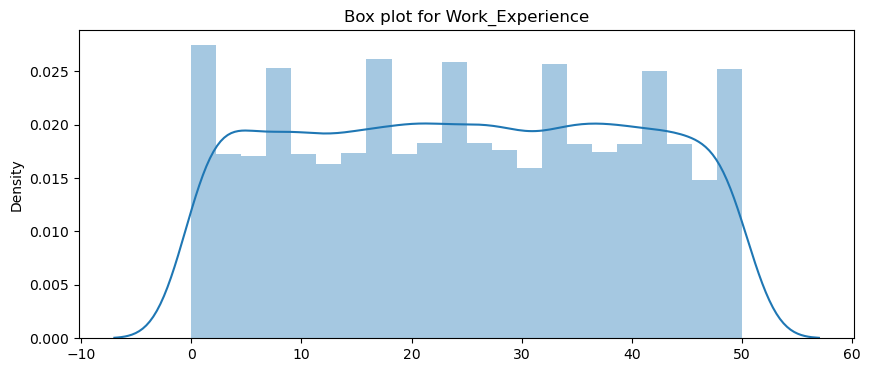

C:\Users\gaura\AppData\Local\Temp\ipykernel_10788\1218534071.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[column])
C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


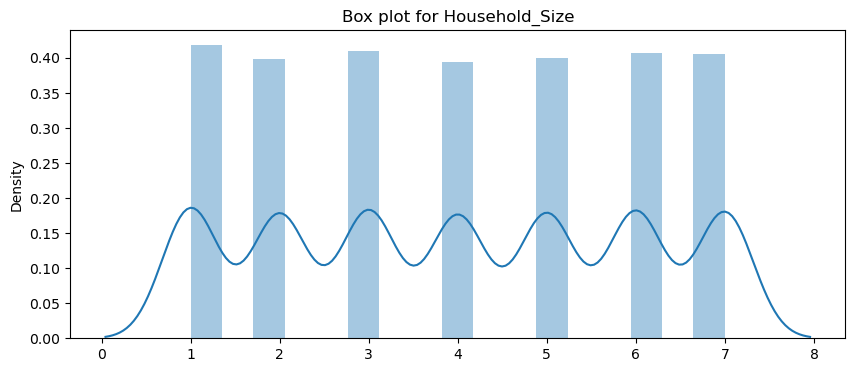

C:\Users\gaura\AppData\Local\Temp\ipykernel_10788\1218534071.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[column])
C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


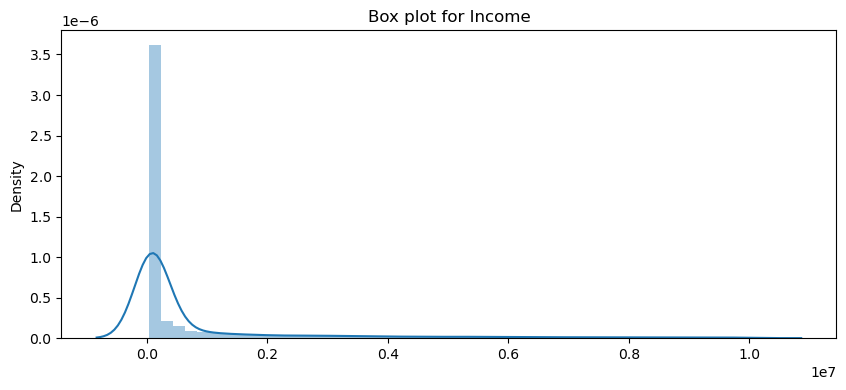

In [18]:
# Example foridentifying outliers in a numeric column using a box plot
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.distplot(x=df[column])
    plt.title(f'Box plot for {column}')
    plt.show()

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


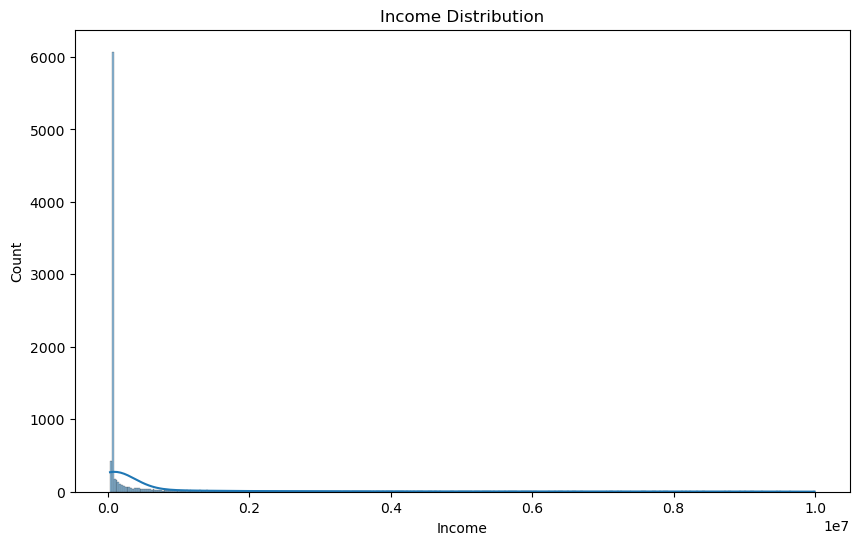

In [19]:
# Visualize the distribution of the target variable (income)
plt.figure(figsize=(10, 6))
sns.histplot(df["Income"], kde=True)
plt.title('Income Distribution')
plt.show()

##  identifying density in a numeric column using a histplot

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


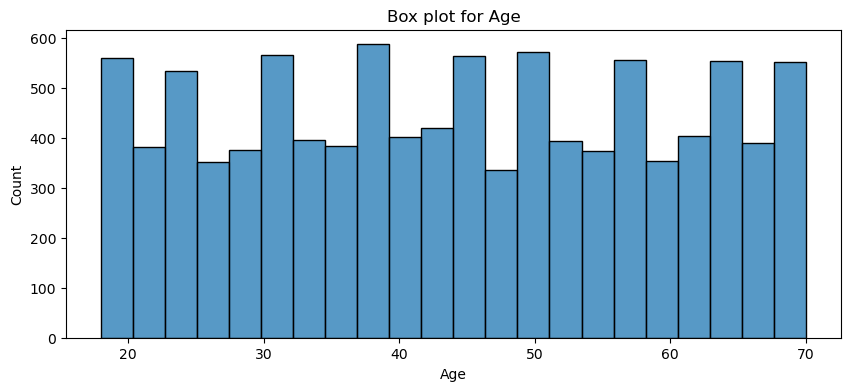

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


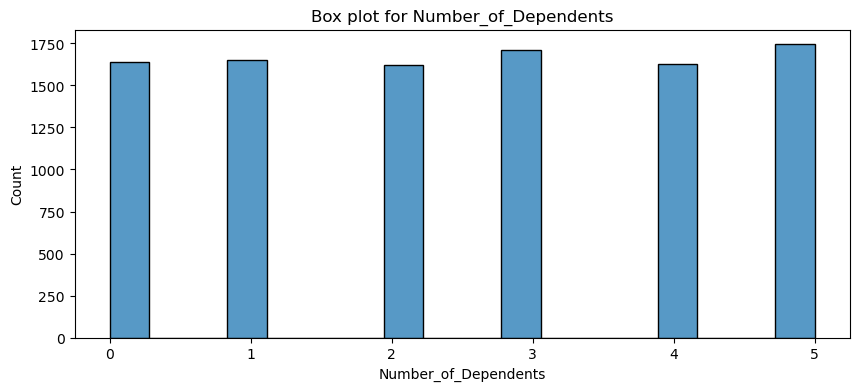

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


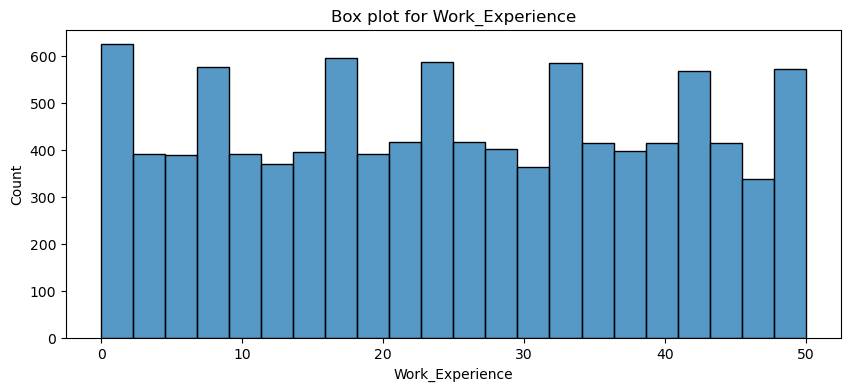

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


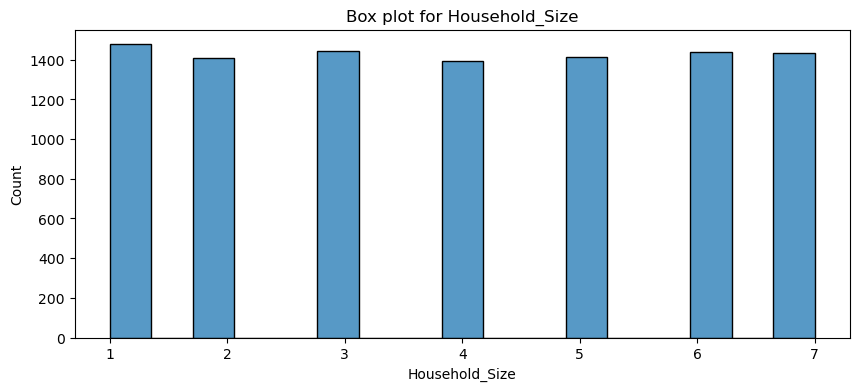

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


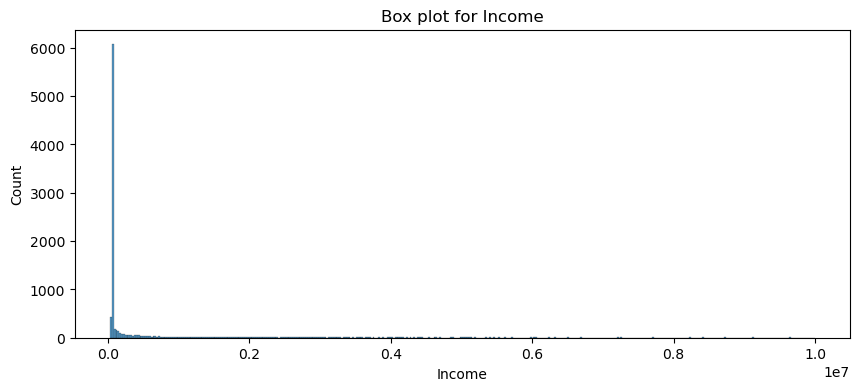

In [20]:
# Example for identifying density in a numeric column using a histplot
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(x=df[column])
    plt.title(f'Box plot for {column}')
    plt.show()

## see the relationships between features and the target variable

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


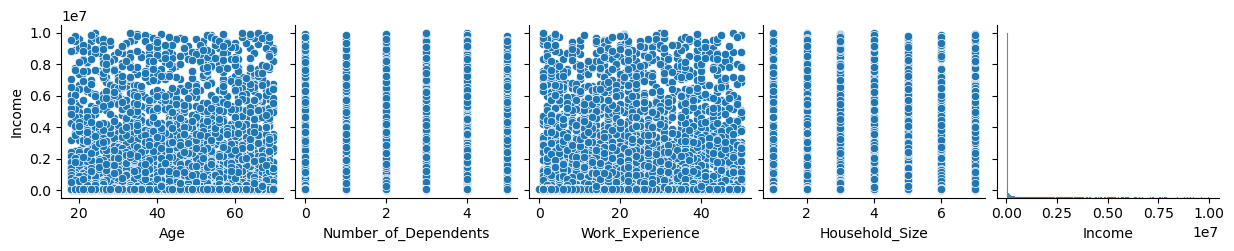

In [21]:
# Pairplot to see the relationships between features and the target variable
sns.pairplot(df, y_vars='Income')
plt.show()


**observation:** A pair plot creates a grid of scatterplots where each scatterplot represents the relationship between a pair of variables.

Education_Level
Bachelor's     4058
High School    2959
Master's       2482
Doctorate       501
Name: count, dtype: int64


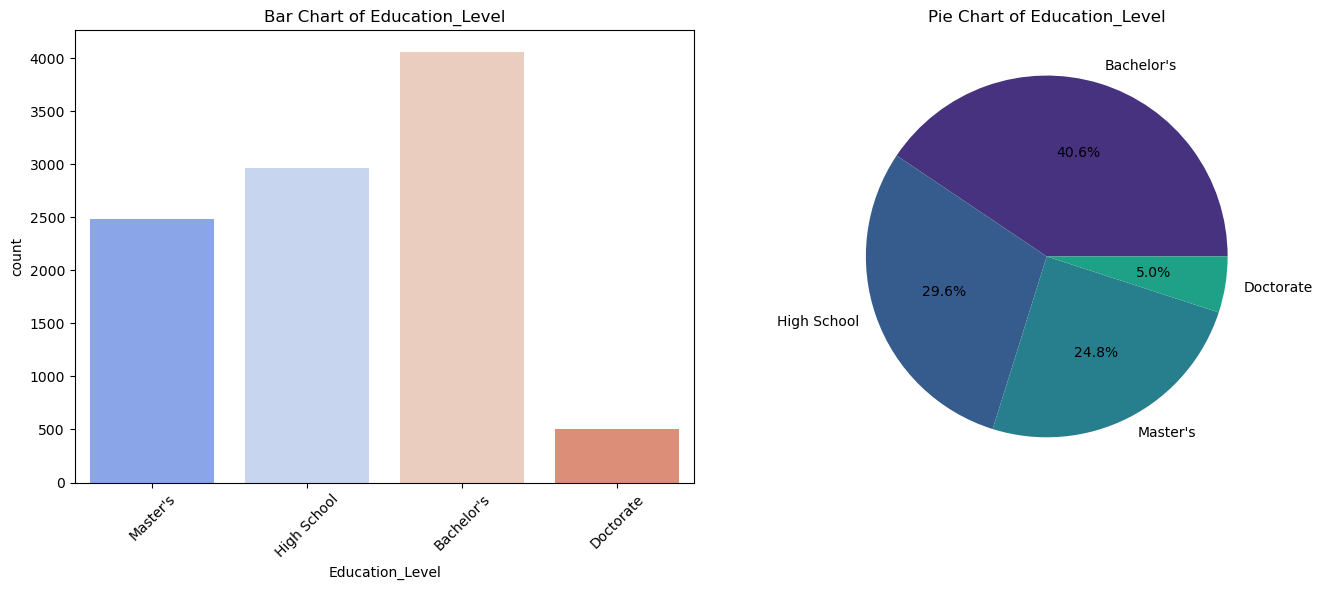

Occupation
Healthcare    3035
Technology    2407
Finance       1525
Others        1521
Education     1512
Name: count, dtype: int64


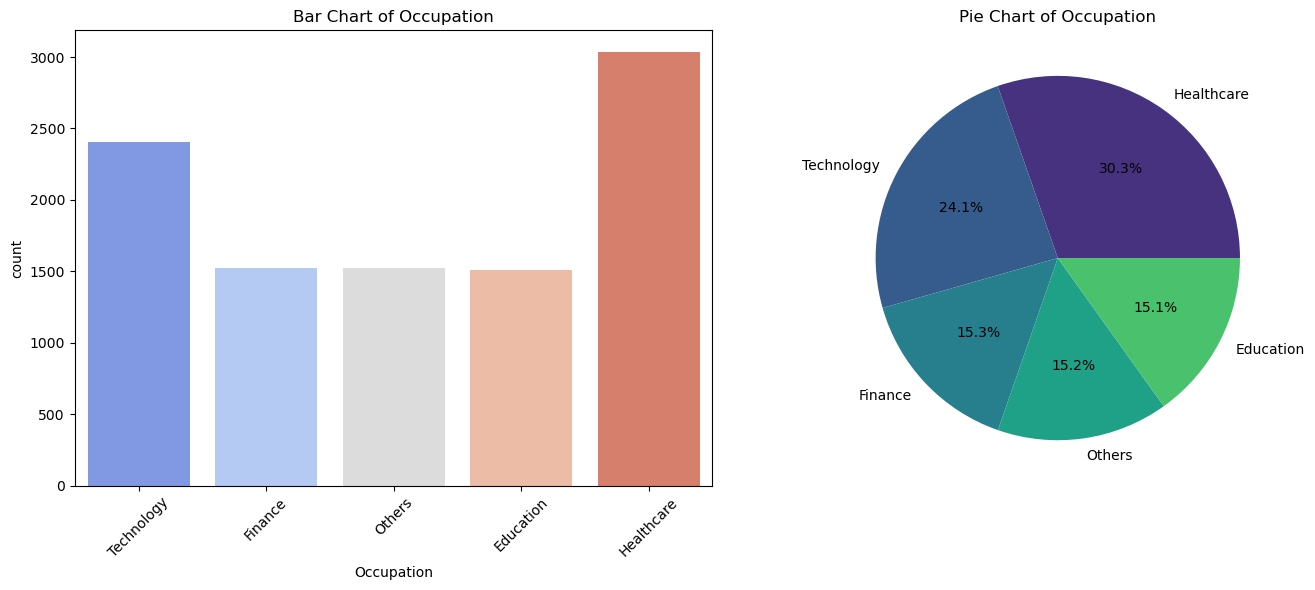

Location
Urban       7037
Suburban    1951
Rural       1012
Name: count, dtype: int64


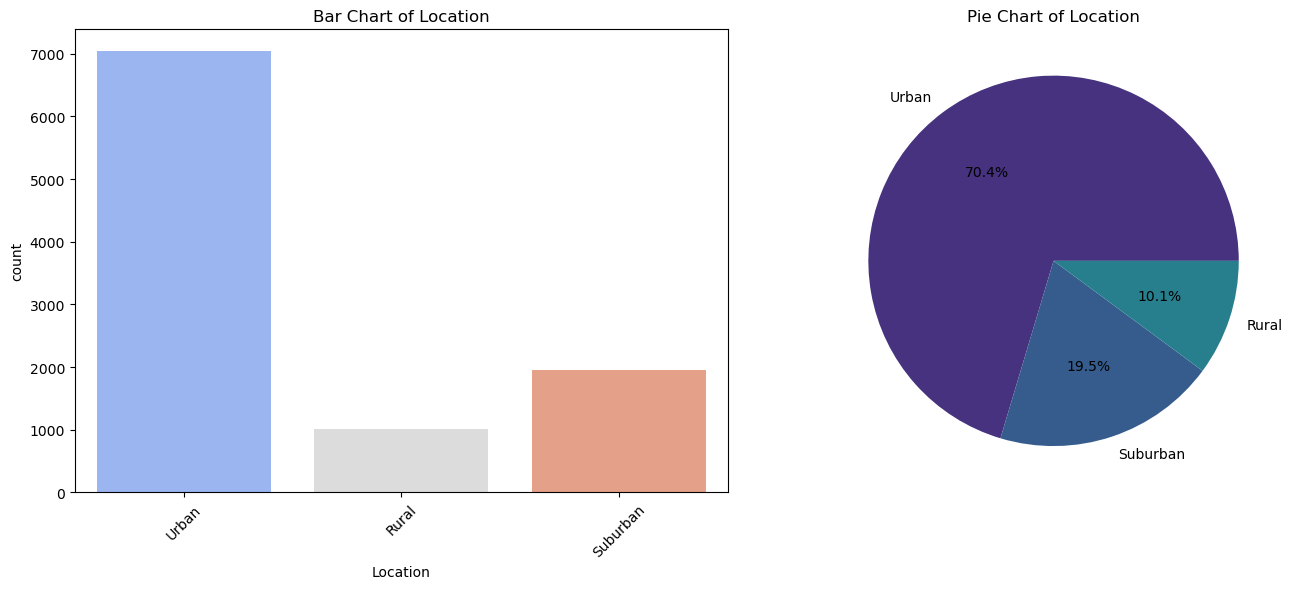

Marital_Status
Married     5136
Single      3900
Divorced     964
Name: count, dtype: int64


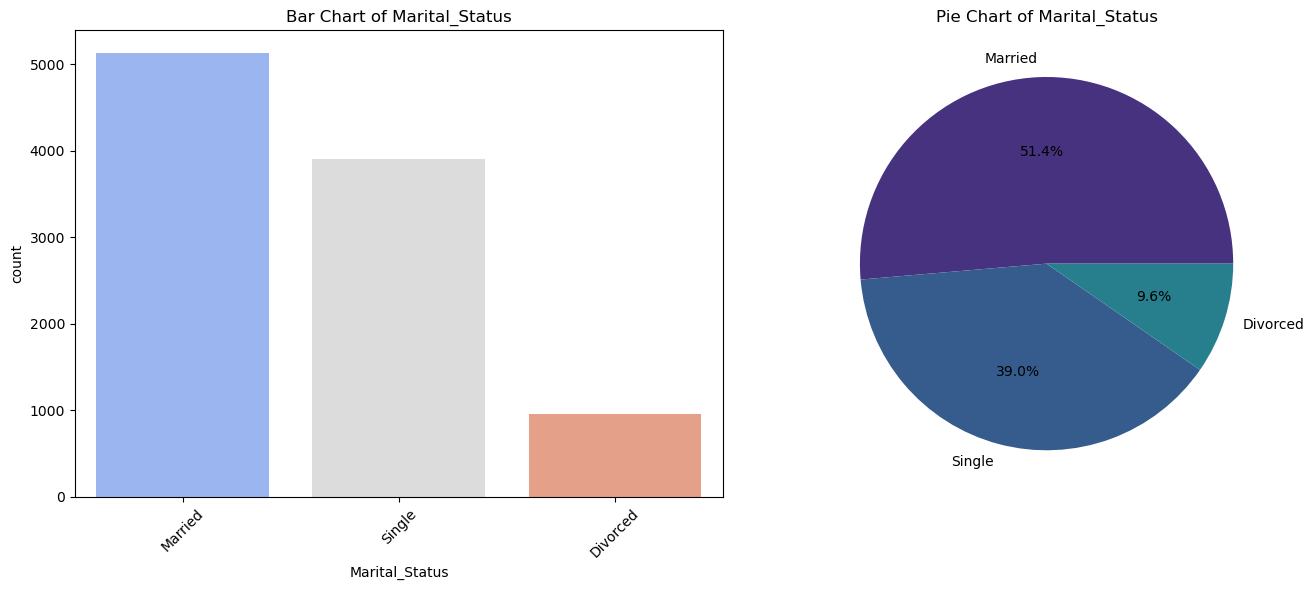

Employment_Status
Full-time        5004
Part-time        3016
Self-employed    1980
Name: count, dtype: int64


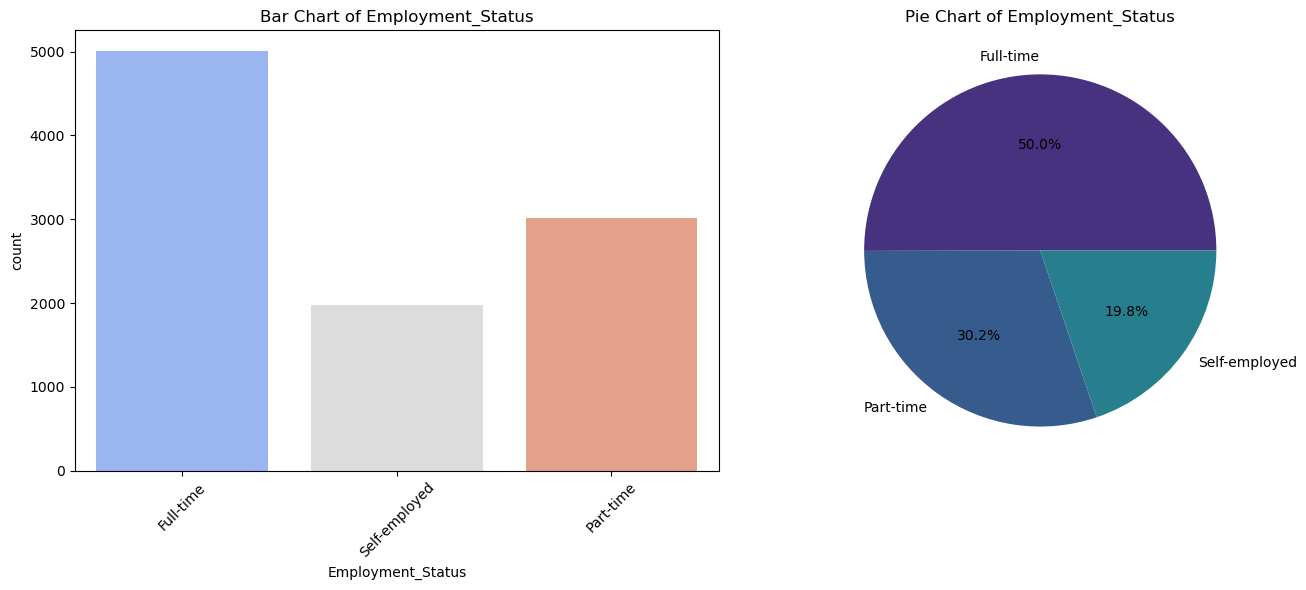

Homeownership_Status
Own     6018
Rent    3982
Name: count, dtype: int64


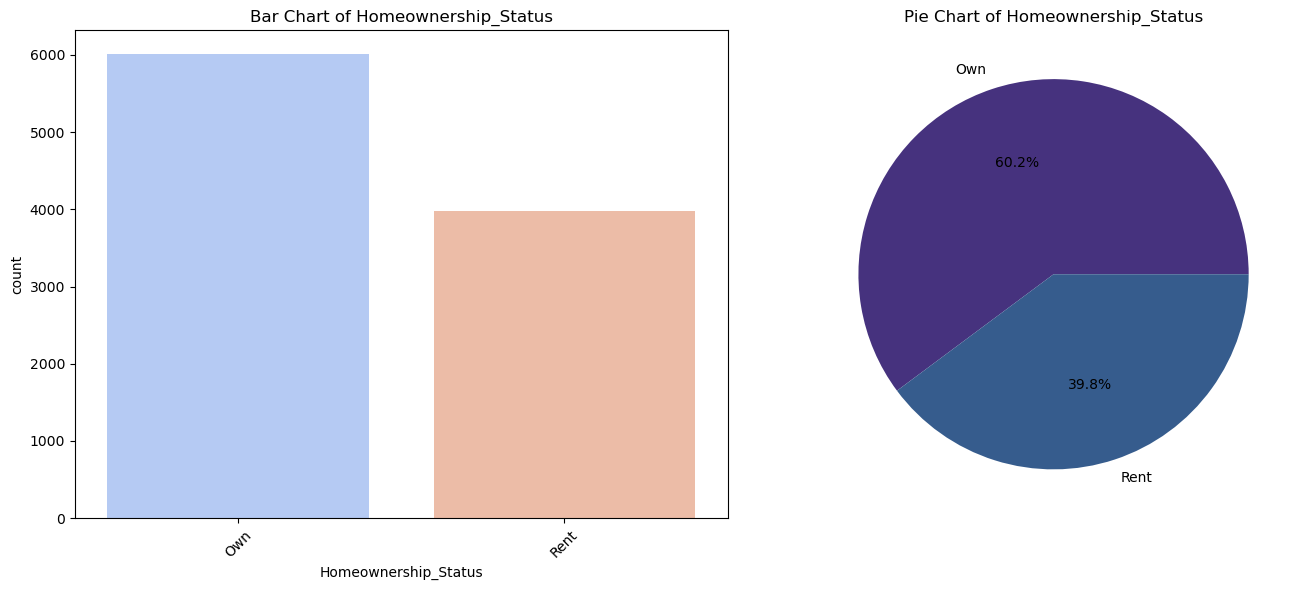

Type_of_Housing
Single-family home    4055
Apartment             4001
Townhouse             1944
Name: count, dtype: int64


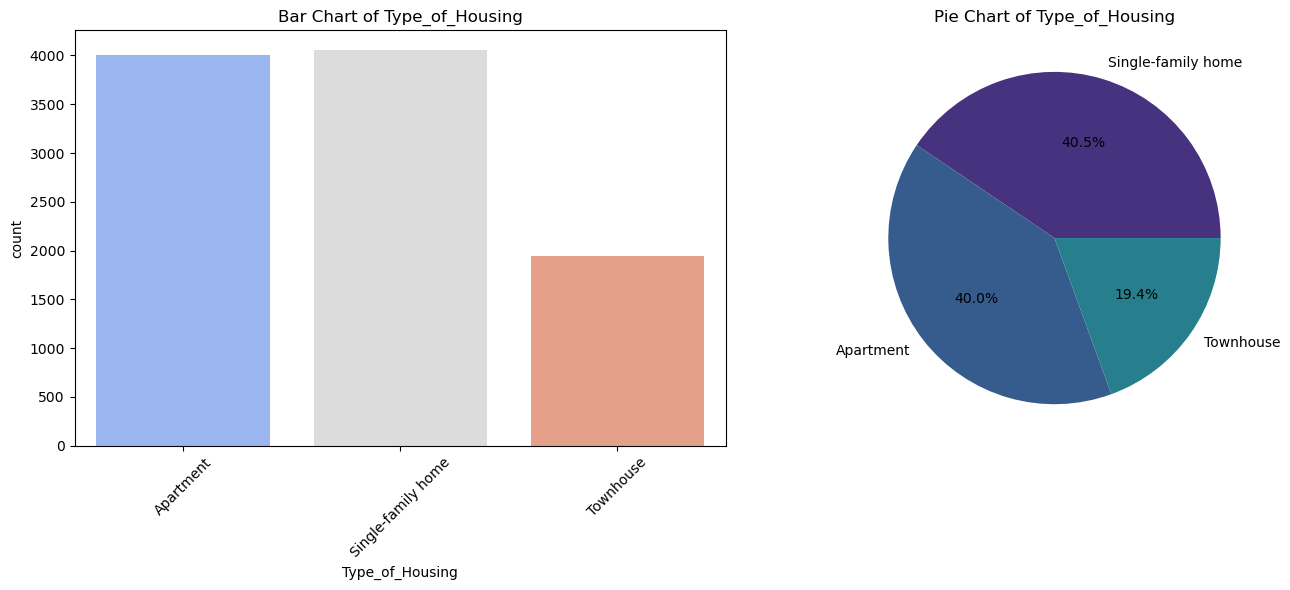

Gender
Male      5123
Female    4877
Name: count, dtype: int64


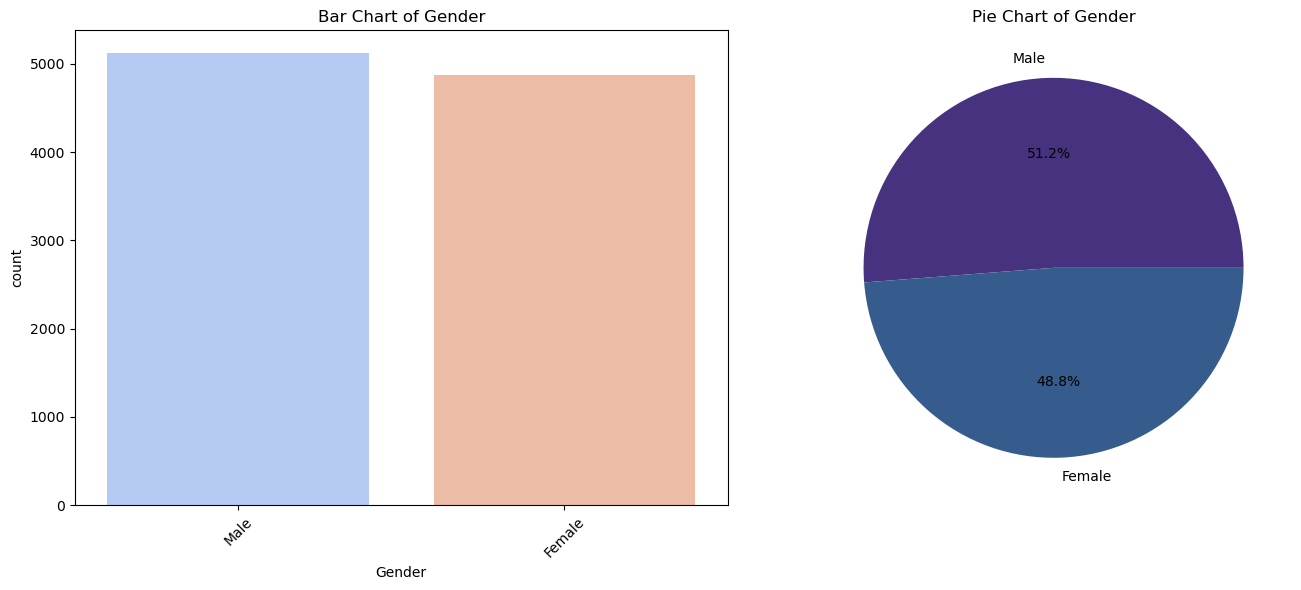

Primary_Mode_of_Transportation
Public transit    4047
Car               2986
Biking            1940
Walking           1027
Name: count, dtype: int64


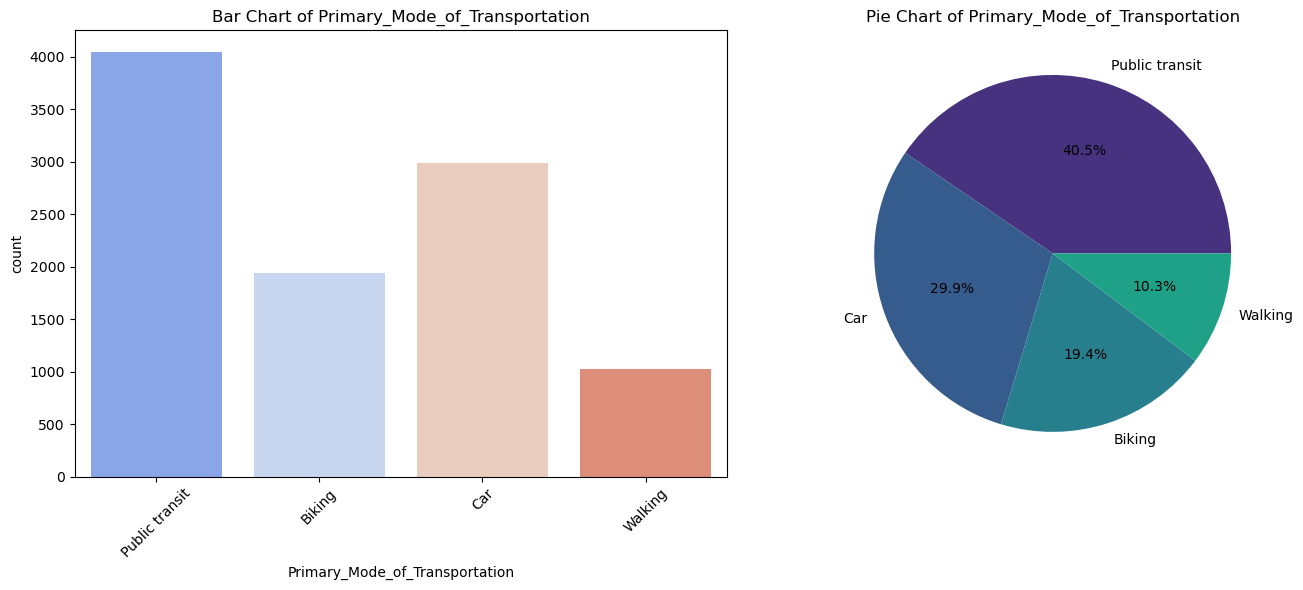

In [22]:
# Iterate through each categorical column
for column in df.select_dtypes(include=["object"]).columns:
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot bar chart
    sns.countplot(data=df, x=column, palette="coolwarm", ax=ax1)
    ax1.set_title(f'Bar Chart of {column}')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    
    # counts of values
    print(df[column].value_counts())
        
    # Plot pie chart
    df[column].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("viridis"), ax=ax2)
    ax2.set_title(f'Pie Chart of {column}')
    ax2.set_ylabel('')

    # Adjust layout
    plt.tight_layout()
    plt.show()


## Remove outliers.


Shape of dataframe after removing outliers: (8069, 14)


C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

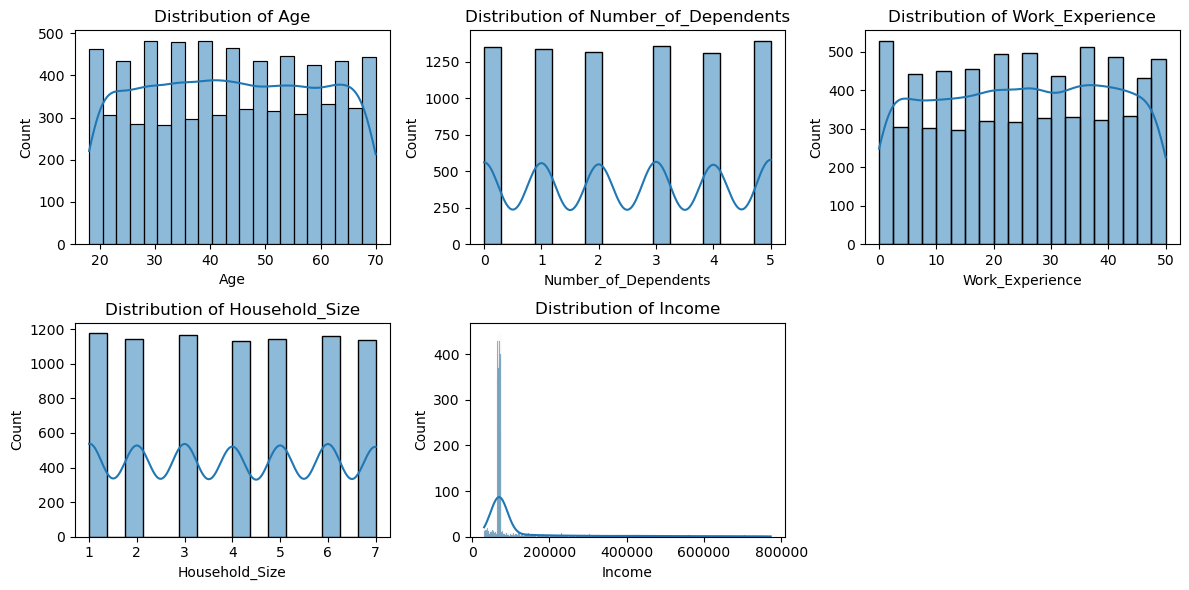

In [23]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of numerical columns to check for outliers
numerical_columns = ['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size', 'Income']

# Remove outliers from each numerical column
for col in numerical_columns:
    df = remove_outliers(df, col)

# Display the shape of the dataframe after removing outliers
print(f"\nShape of dataframe after removing outliers: {df.shape}")



# Visualize the distribution of numerical columns after outlier removal
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

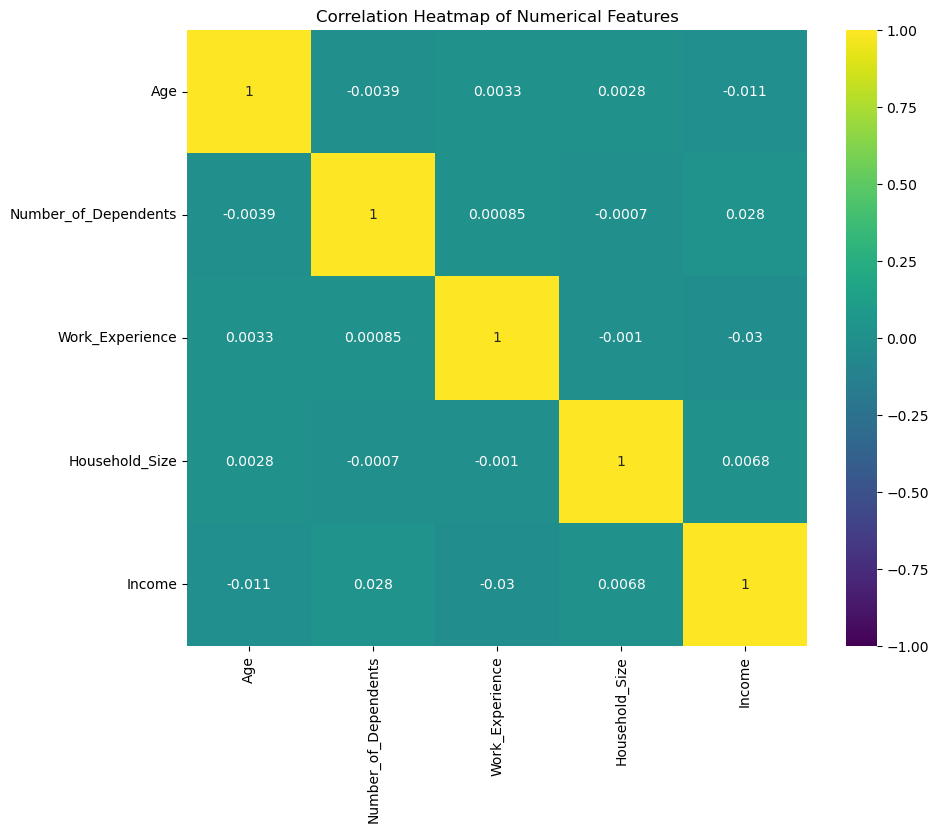

In [24]:
# Compute the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [25]:
df.shape

(8069, 14)

### Convert categorical variables to numerical format using one-hot encoding.

In [26]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=["object"]).columns


# Create dummy variables
df_encoded = pd.get_dummies(df, columns=categorical_columns,drop_first = True)

# Display the first few rows of the encoded dataframe
print("\nDataFrame with Dummy Variables:")
print(df_encoded.head())


DataFrame with Dummy Variables:
   Age  Number_of_Dependents  Work_Experience  Household_Size  Income  \
0   56                     5               21               7   72510   
1   69                     0                4               7   75462   
2   46                     1                1               7   71748   
3   32                     2               32               1   74520   
4   60                     3               15               4  640210   

   Education_Level_Doctorate  Education_Level_High School  \
0                      False                        False   
1                      False                         True   
2                      False                        False   
3                      False                         True   
4                      False                        False   

   Education_Level_Master's  Occupation_Finance  Occupation_Healthcare  ...  \
0                      True               False                  False  ...   
1  

### Compute the correlation matrix, including the target column

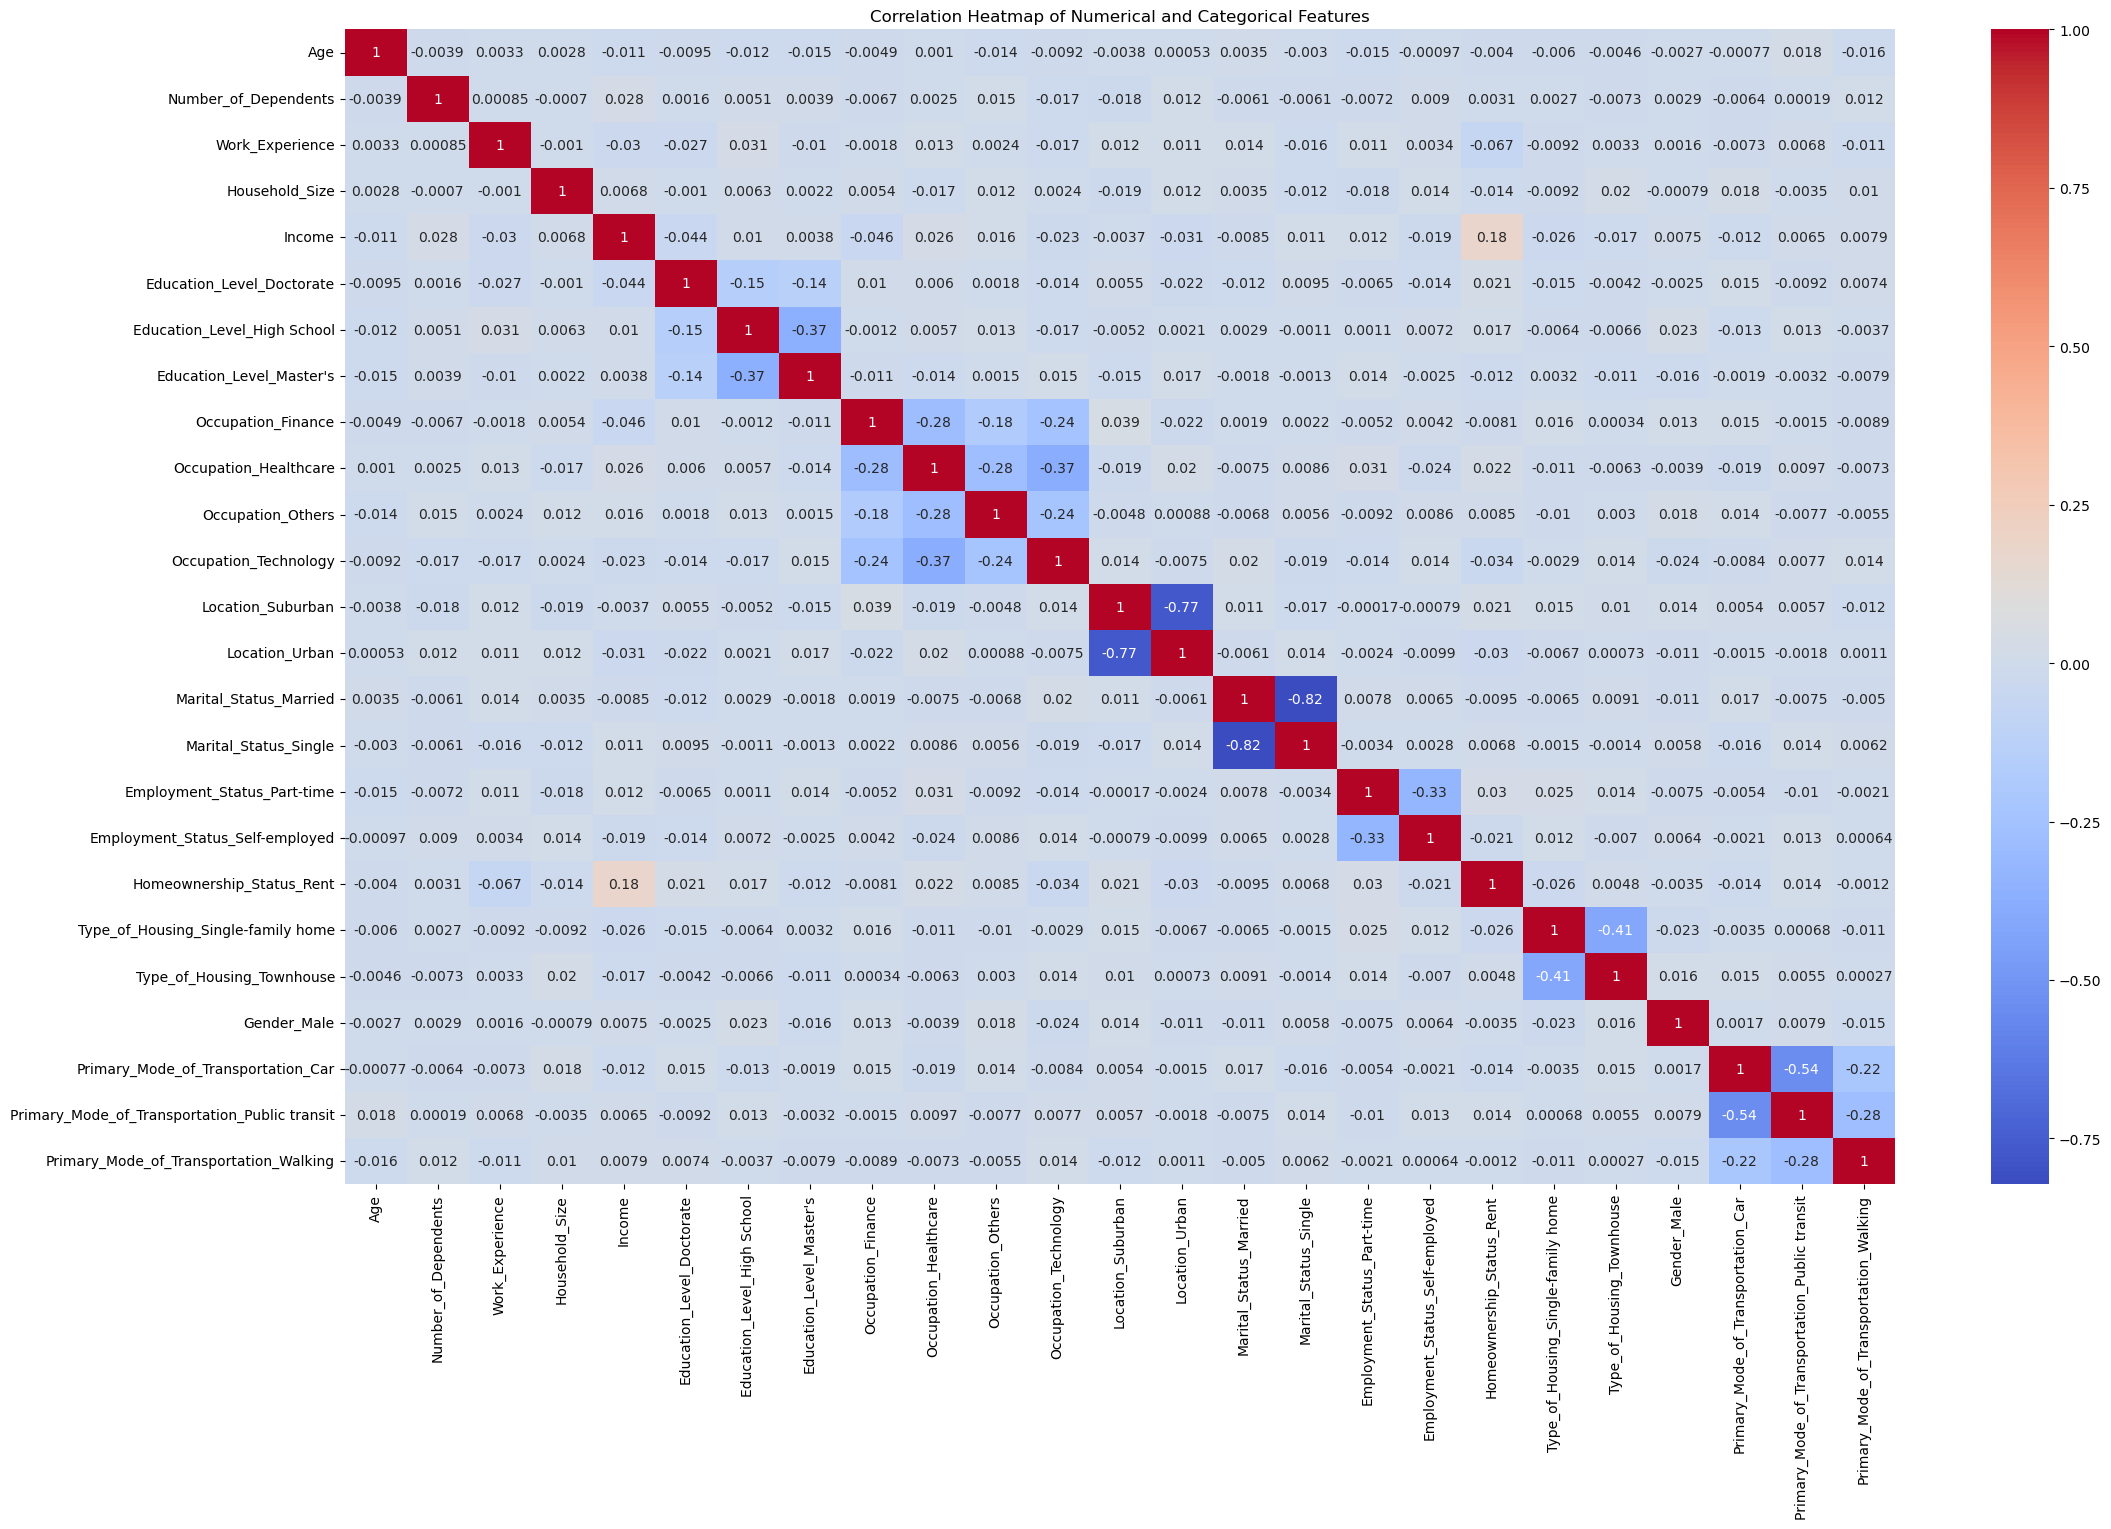

In [27]:
# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical and Categorical Features')
plt.show()

In [28]:
from scipy.stats import chi2_contingency
# Discretize the target variable
df['Income Category'] = pd.qcut(df['Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
# Perform Chi-square tests
chi2_results = {}
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['Income Category'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[col] = {'Chi2 Statistic': chi2, 'P-value': p}

# Convert results to DataFrame for display
chi2_results_df = pd.DataFrame(chi2_results).T
print(chi2_results_df)

                                Chi2 Statistic       P-value
Education_Level                      23.984100  4.326520e-03
Occupation                           41.007857  4.885442e-05
Location                             33.545306  8.233351e-06
Marital_Status                        1.294411  9.719650e-01
Employment_Status                    23.336762  6.911885e-04
Homeownership_Status                373.621186  1.144205e-80
Type_of_Housing                      42.400113  1.532819e-07
Gender                                2.436840  4.868138e-01
Primary_Mode_of_Transportation        2.965015  9.656658e-01


## Code for Feature Selection and Engineering

In [31]:
# Drop target column to separate features and target
X = df_encoded.drop(columns=['Income'])
y = df_encoded['Income']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardzing the data set
from sklearn.preprocessing import StandardScaler # fit vs tranform vs fit_transfrom
scaler = StandardScaler()
scaler.fit(X_train)
xtrain = scaler.transform(X_train)
xtest = scaler.transform(X_test)

In [32]:
# Training the model
lm = LinearRegression()
lm.fit(xtrain,y_train)

LinearRegression()

## Checking Intercept and coefficient

In [33]:
print(f"the Intercept is {lm.intercept_}") # Give the Intercept
print(f"check to Coefficient{lm.coef_}")  # Give the Coefficient

the Intercept is 116387.84678543765
check to Coefficient[-8.44465832e+02  3.23248016e+03 -1.90717318e+03  1.04205559e+03
 -6.44659522e+03 -1.05538797e+02  2.73796013e+02 -5.93002684e+03
  1.02291411e+02 -3.51107143e+02 -3.63631713e+03 -8.08502623e+03
 -1.13634735e+04  1.54909788e+02  7.50861657e+02  7.65004570e+02
 -3.60784019e+03  2.09539901e+04 -4.45277672e+03 -3.97274306e+03
  4.43737270e+02 -1.27386297e+03 -1.06455015e+01  8.97254816e+01]


### Prediciton 


In [34]:
pred_train = lm.predict(xtrain)
pred_test = lm.predict(xtest)
pred_train

array([ 91179.30434109, 106335.21708003, 160666.70998183, ...,
        88752.18884825, 136229.7315462 , 106684.29308494])

## Accessing the model perfromance

In [35]:
print(f"RMSE for train data is {np.sqrt(mean_squared_error(y_train,pred_train))}")
print(f"R2 for train data is{r2_score(y_train,pred_train)}")
print(f"RMSE for test data is {np.sqrt(mean_squared_error(y_test,pred_test))}")
print(f"R2 for test data is {r2_score(y_test,pred_test)}")

RMSE for train data is 127024.57896449736
R2 for train data is0.03858919450692044
RMSE for test data is 118527.73664507088
R2 for test data is 0.05073381655606779


In [36]:
import statsmodels.api as sm
xtrain = sm.add_constant(xtrain)
model = sm.OLS(y_train,xtrain).fit()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     10.75
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           3.38e-40
Time:                        11:26:39   Log-Likelihood:                -85019.
No. Observations:                6455   AIC:                         1.701e+05
Df Residuals:                    6430   BIC:                         1.703e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.164e+05   1584.099     73.473      0.000    1.13e+05    1.19e+05
x1          -844.4658   1586.316     -0.532      0.595   -3954.172    2265.241
x2          3232.4802   1586.687      2.037      0.042     122.046    6342.915
x3         -1907.1732   1590.879     -1.199      0.231   -5025.827    1211.480
x4          1042.0556   1587.061      0.657      0.511   -2069.113    4153.224
x5         -6446.5952   1644.445     -3.920      0.000   -9670.256   -3222.935
x6          -105.5388   1751.505     -0.060      0.952   -3539.072    3327.995
x7           273.7960   1747.328      0.157      0.875   -3151.549    3699.141
x8         -5930.0268   2085.457     -2.844      0.004      -1e+04   -1841.837
x9           102.2914   2312.302      0.044      0.965   -4430.590    4635.173
x10         -351.1071   2082.501     -0.169      0.866   -4433.503    3731.289
x11        -3636.3171   2239.816     -1.623      0.105   -8027.103     754.469
x12        -8085.0262   2499.954     -3.234      0.001    -1.3e+04   -3184.285
x13        -1.136e+04   2498.875     -4.547      0.000   -1.63e+04   -6464.847
x14          154.9098   2793.123      0.055      0.956   -5320.542    5630.361
x15          750.8617   2792.834      0.269      0.788   -4724.024    6225.747
x16          765.0046   1680.728      0.455      0.649   -2529.783    4059.792
x17        -3607.8402   1677.680     -2.150      0.032   -6896.651    -319.029
x18         2.095e+04   1591.519     13.166      0.000    1.78e+04    2.41e+04
x19        -4452.7767   1745.040     -2.552      0.011   -7873.636   -1031.918
x20        -3972.7431   1743.463     -2.279      0.023   -7390.511    -554.975
x21          443.7373   1587.006      0.280      0.780   -2667.323    3554.798
x22        -1273.8630   2114.477     -0.602      0.547   -5418.941    2871.215
x23          -10.6455   2144.620     -0.005      0.996   -4214.815    4193.524
x24           89.7255   1852.384      0.048      0.961   -3541.565    3721.016
==============================================================================
Omnibus:                     3908.936   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29566.305
Skew:                           2.947   Prob(JB):                         0.00
Kurtosis:                      11.671   Cond. No.                         3.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion
- By training and evaluating multiple regression models, we can determine the best model for predicting   household income. The interpretation of coefficients and feature importances provides insights into     the factors that significantly affect household income.

- Example Insights:
 - Work Experience and Age: Likely to have a strong positive impact on income.
 - Education Level: Higher levels of education may be associated with higher income.
 - Employment Status: Full-time employment might correlate positively with higher income.
 - Location: Urban areas may have higher income levels compared to rural areas.
- This analysis helps in understanding the socioeconomic determinants of household income, which can be useful for policy-making and economic planning.